# Audiobooks business case

## Preprocess the data. Balance the dataset. Create 3 datasets: training, validation, and test. Save the newly created sets in a tensor friendly format (e.g. *.npz)

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code, which is not that hard, but is crucial to creating a good model.

If you want to know how to do that, go through the code. In any case, this should do the trick for most datasets organized in the way: many inputs, and then 1 cell containing the targets (supervised learning datasets). Keep in mind that a specific problem may require additional preprocessing.

Note that we have removed the header row, which contains the names of the categories. We simply want the data.

This code does not include comments - it is the same as the one in the lesson. Please refer to the other file if you want the code with comments.

### Extract the data from the csv

In [2]:
import numpy as np
from sklearn import preprocessing
from PIL import Image 

raw_csv_data = np.loadtxt('Audiobooks_data.csv', delimiter = ',')

unscaled_inputs_all = raw_csv_data[:,1:-1]
# Parameter kedua itu berarti kita mengambil semua baris, dan kolom kedua sampai kolom terakhir kecuali kolom terakhir
targets_all = raw_csv_data[:,-1]
# kita simpan target kita di variabel terget_all

In [3]:
raw_csv_data

array([[9.9400e+02, 1.6200e+03, 1.6200e+03, ..., 5.0000e+00, 9.2000e+01,
        0.0000e+00],
       [1.1430e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0590e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 3.8800e+02,
        0.0000e+00],
       ...,
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00],
       [2.5100e+02, 1.6740e+03, 3.3480e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [10]:
unscaled_inputs_all

array([[1620.  , 1620.  ,   19.73, ..., 1603.8 ,    5.  ,   92.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    0.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,  388.  ],
       ...,
       [2160.  , 2160.  ,    6.14, ...,    0.  ,    0.  ,    0.  ],
       [1620.  , 1620.  ,    5.33, ...,  615.6 ,    0.  ,   90.  ],
       [1674.  , 3348.  ,    5.33, ...,    0.  ,    0.  ,    0.  ]])

### Balance the dataset

Garis besar cara kerja kode: <br>
1. Target itu ada 2 isinya, 0 atau ga 1
2. Target terlalu banyak yang 0
3. Kita mau balancing 
4. Cari tau berapa banyak 1
4. Kita itung banyak 0 sampe dia sejumlah / lebih dari banyak 1
5. Simpen index-index 0 yang baru dicari saat jumlah banyak 0 > jumlah banyak 1

In [3]:
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
    if targets_all[i] ==0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i) # masukin index yang akan dihapus
            
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete (targets_all, indices_to_remove, axis=0)

In [4]:
unscaled_inputs_equal_priors

array([[1620.  , 1620.  ,   19.73, ..., 1603.8 ,    5.  ,   92.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    0.  ],
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,  388.  ],
       ...,
       [2160.  , 2160.  ,    5.33, ...,    0.  ,    0.  ,    6.  ],
       [1674.  , 3348.  ,    7.99, ...,    0.  ,    0.  ,    0.  ],
       [1674.  , 3348.  ,    5.33, ...,    0.  ,    0.  ,    0.  ]])

### Standardize the inputs

In [5]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffle the data

In [6]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

### Split the dataset into train, validation, and test

In [7]:
samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1819.0 3579 0.5082425258452081
217.0 447 0.4854586129753915
201.0 448 0.4486607142857143


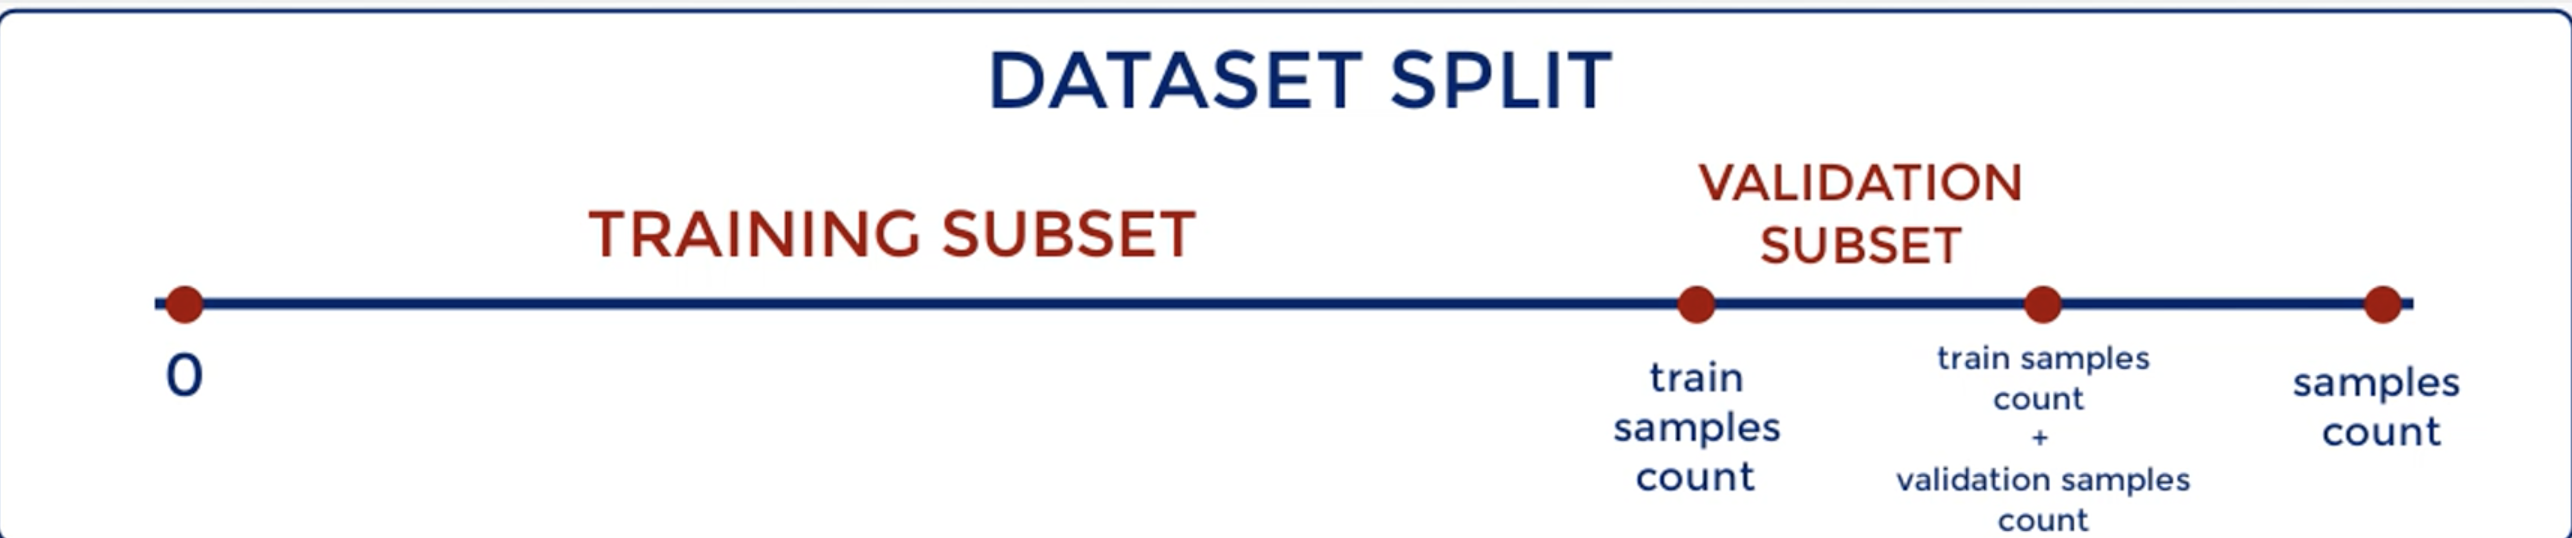

In [8]:
Image.open('dataset_split.png')

### Save the three datasets in *.npz

In [9]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)